In [60]:
import numpy as np
import random
import torch
from torch import nn, optim
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from torch.optim.lr_scheduler import StepLR

In [61]:
import cifar10_model_ourdesign as cifar10_model_ourdesign
model_file="cifar10_model.pt"
epochs=50
end_loss=0.2

In [62]:
# import cifar10_resnet as cifar10_model
# model_file="cifar10_resnet.pt"
# epochs=10
# end_loss=0.45

In [63]:
torch.manual_seed(10)
np.random.seed(10)
random.seed(10)

In [64]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914,0.4822,0.4465),
        std=(0.2470,0.2435,0.2616))
])

In [65]:
train_data=datasets.CIFAR10('data/cifar10/train',train=True,download=True,transform=transform)
print(train_data.data.shape)

Files already downloaded and verified
(50000, 32, 32, 3)


In [66]:
dev_size=0.2
idx=list(range(len(train_data)))
np.random.shuffle(idx)
split_size=int(np.floor(dev_size*len(train_data)))
train_idx, dev_idx=idx[split_size:], idx[:split_size]
train_sampler=SubsetRandomSampler(train_idx)
dev_sampler=SubsetRandomSampler(dev_idx)

In [67]:
batch_size=100
train_loader= DataLoader(train_data,batch_size=batch_size,sampler=train_sampler)
dev_loader= DataLoader(train_data,batch_size=batch_size,sampler=dev_sampler)
print(len(train_loader),len(dev_loader))

400 100


In [68]:
data_batch,label_batch=next(iter(train_loader))
print(data_batch.size(),label_batch.size())

torch.Size([100, 3, 32, 32]) torch.Size([100])


In [69]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"deivce:{device}")

deivce:cuda


In [70]:
model=cifar10_model_ourdesign.CNN().to(device)

In [71]:
loss_function=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [72]:
train_losses=[]
dev_losses=[]
x_axis=[]
for epoch in range(epochs+1):
    scheduler.step()
    train_loss=0
    # 訓練資料
    model.train()
    for data,target in tqdm(train_loader):        
        data=data.to(device)
        target=target.to(device)
        
        pred=model(data)
        loss=loss_function(pred,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()

    train_loss=train_loss/len(train_loader)
    
    x_axis.append(epoch)
    with torch.no_grad():
        dev_loss=0
        # 驗證資料
        model.eval()
        for data_dev,target_dev in tqdm(dev_loader):               
            data_dev=data_dev.to(device)
            target_dev=target_dev.to(device)

            dev_pred=model(data_dev)
            loss2=loss_function(dev_pred,target_dev)
            dev_loss += loss2.item()

        dev_loss=dev_loss/len(dev_loader)

    train_losses.append(train_loss)
    dev_losses.append(dev_loss)

    print(f"epoch: {epoch}, Train_loss: {train_loss:.3f}, Valid_loss: {dev_loss:.3f}")
    
    if train_loss < end_loss:
        break

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.65it/s]


epoch: 0, Train_loss: 1.410, Valid_loss: 0.982


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.40it/s]


epoch: 1, Train_loss: 0.951, Valid_loss: 0.660


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.91it/s]


epoch: 2, Train_loss: 0.772, Valid_loss: 0.632


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.36it/s]


epoch: 3, Train_loss: 0.663, Valid_loss: 0.571


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.88it/s]


epoch: 4, Train_loss: 0.555, Valid_loss: 0.589


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.57it/s]


epoch: 5, Train_loss: 0.482, Valid_loss: 0.447


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.22it/s]


epoch: 6, Train_loss: 0.407, Valid_loss: 0.463


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.06it/s]


epoch: 7, Train_loss: 0.347, Valid_loss: 0.508


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.92it/s]


epoch: 8, Train_loss: 0.312, Valid_loss: 0.525


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.73it/s]


epoch: 9, Train_loss: 0.240, Valid_loss: 0.346


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.07it/s]


epoch: 10, Train_loss: 0.218, Valid_loss: 0.347


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.75it/s]


epoch: 11, Train_loss: 0.212, Valid_loss: 0.351


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.92it/s]


epoch: 12, Train_loss: 0.203, Valid_loss: 0.353


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.08it/s]

epoch: 13, Train_loss: 0.198, Valid_loss: 0.360


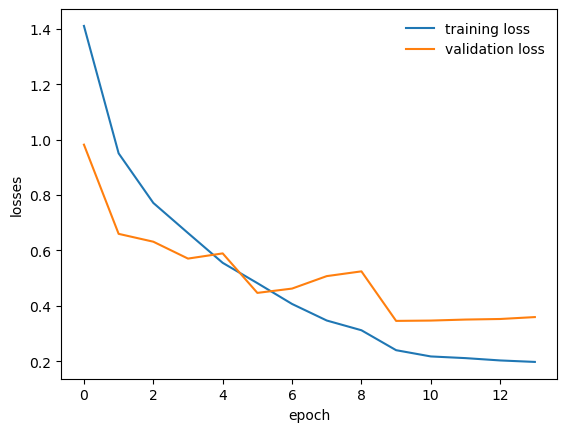

In [73]:
plt.plot(x_axis,train_losses,label="training loss")
plt.plot(x_axis,dev_losses,label="validation loss")
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [74]:
model=model.to("cpu")
torch.save(model.state_dict(),model_file)